# ISLR ex9. (multiple linear regression on Auto dataset)

In [ ]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.regression import linear_model


In [ ]:
df = pd.read_csv('Auto.csv')

In [ ]:
#removing irrelevant 'car name' column
df.drop('name',axis=1,inplace=True)

df = df.replace('?', np.nan)
df =df.dropna()
df['horsepower'] = df['horsepower'].astype(float)

In [ ]:
# header1

# 2.a) Produce a scatterplot matrix which includes all of the variables in the data set.

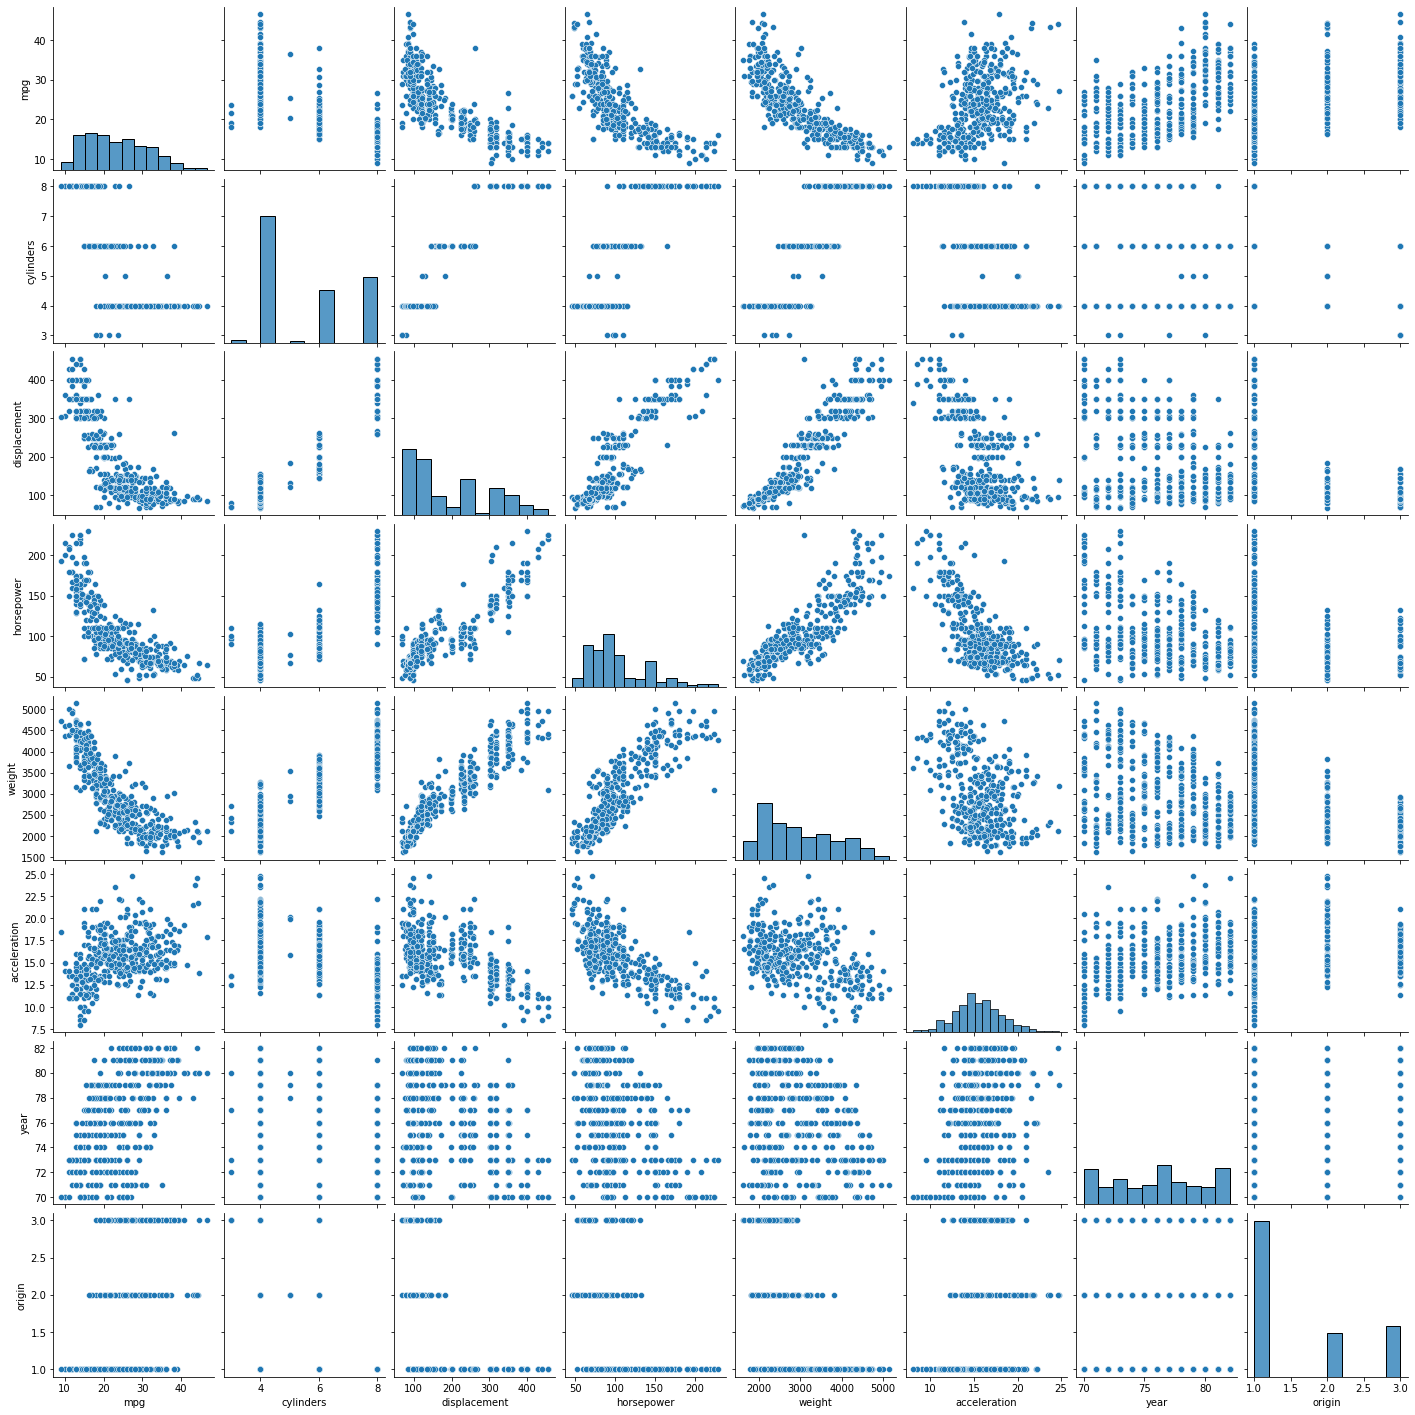

In [ ]:
sns.pairplot(df)

# 2.b) Compute the matrix of correlations between the variables

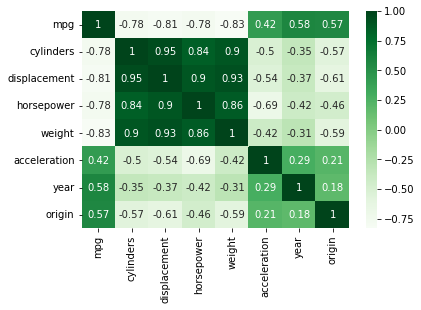

In [ ]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap = 'Greens')

# 2.c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

i. Is there a relationship between the predictors and the response?


**Ans** มีความสัมพันธ์ระหว่างตัว predictor และ reponse โดยสามารถสังเกตได้จากค่า correlation ของแต่ละ predictor
 


ii. Which predictors appear to have a statistically significant relationship to the response?


**Ans** displacement, weight, year และ origin โดยได้ดูจากค่า coefficient ที่อยู่ในตำแหน่งของแต่ละ predictor ควบคู่กับค่า p-value โดยถ้าค่า coefficient มีค่าน้อยและ p-value มีค่ามากกว่าที่กำหนด จะถือว่าไม่มีความ significant ต่อตัว response


iii. What does the coefficient for the year variable suggest?


**Ans** coefficient ของปีคือ 0.7508 ซึ่งสามารถตีความได้ว่าเมื่อกำหนดให้predictor ตัวอื่นมีค่าคงที่ เมื่อค่าปีเพิ่มขึ้น 1 จะทำให้ค่า mgp เพิ่มขึ้น 0.7508

In [ ]:
Y = df['mpg']
X = df.drop('mpg', axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          2.04e-139
Time:                        01:27:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

# 2.d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit.

**Ans** จาก Residual vs Leverage plot จะพบว่าค่าในแกน x คือค่า diagonal ของ Hat matrix จะมีจุดที่มีค่าของแกน x สูงกว่าค่า threshold ซึ่งก็คือ 0.0357 ทำให้จะมีจุดที่เป็น high leverage point และค่าในแกน y คือค่า residual ที่ถูก standardize ซึ่งจากกราฟจะพบว่ามีค่าในแกน y ที่สูงดังนั้นจึงสามารถสรุปได้ว่ามีจุดที่เป็น outlier


In [ ]:
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


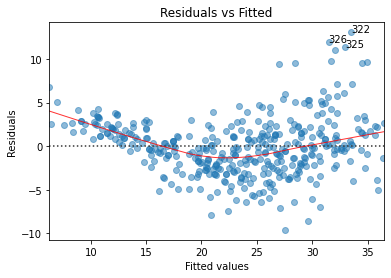

In [ ]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(6)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

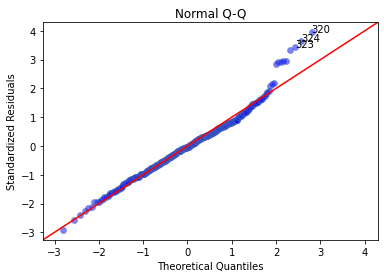

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


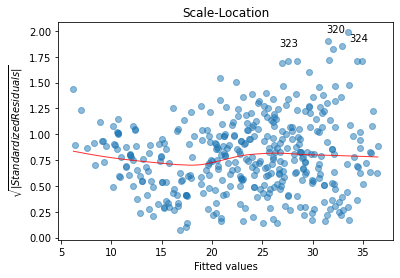

In [ ]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(4)
plot_lm_3.set_figwidth(6)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Threshold of leverage point is 0.03571428571428571


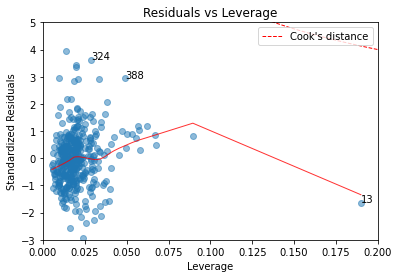

In [ ]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(4)
plot_lm_4.set_figwidth(6)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
threshold = 2 *  (len(X.columns) - 1)/ len(Y)
print('Threshold of leverage point is', threshold)   
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

# 2.e) Do any interactions appear to be statistically significant?

**Ans** interaction ที่ออกมา statistically significant นั้นมี cylinders:year, displacement:year, horsepower:acceleration    , horsepower:year, acceleration:year และ acceleration:origin โดยวัดจากค่า p-value ที่มีค่าน้อยกว่า 0.05


In [ ]:
#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X[X.columns[1:]])
#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['cylinders','displacement','horsepower','weight','acceleration','year','origin',
                                                       'cylinders:displacement','cylinders:horsepower','cylinders:weight','cylinders:acceleration',
                                                       'cylinders:year','cylinders:origin','displacement:horsepower','displacement:weight',
                                                       'displacement:acceleration','displacement:year','displacement:origin','horsepower:weight',
                                                       'horsepower:acceleration','horsepower:year','horsepower:origin','weight:acceleration',
                                                       'weight:year','weight:origin','acceleration:year','acceleration:origin','year:origin'])

In [ ]:
interaction_df

,cylinders,displacement,horsepower,weight,acceleration,year,origin,cylinders:displacement,cylinders:horsepower,cylinders:weight,...,horsepower:weight,horsepower:acceleration,horsepower:year,horsepower:origin,weight:acceleration,weight:year,weight:origin,acceleration:year,acceleration:origin,year:origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,2456.0,1040.0,28032.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,2800.0,1320.0,29544.0,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,2544.0,1200.0,27488.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,2432.0,1200.0,27464.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,2416.0,1120.0,27592.0,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,560.0,344.0,11160.0,...,239940.0,1341.6,7052.0,86.0,43524.0,228780.0,2790.0,1279.2,15.6,82.0
388,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,388.0,208.0,8520.0,...,110760.0,1279.2,4264.0,104.0,52398.0,174660.0,4260.0,2017.2,49.2,164.0
389,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,540.0,336.0,9180.0,...,192780.0,974.4,6888.0,84.0,26622.0,188190.0,2295.0,951.2,11.6,82.0
390,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,480.0,316.0,10500.0,...,207375.0,1469.4,6478.0,79.0,48825.0,215250.0,2625.0,1525.2,18.6,82.0


In [ ]:
Ynew = Y.reset_index().drop('index' ,axis = 1)

In [ ]:
interaction_model = linear_model.OLS(Ynew, interaction_df).fit()

In [ ]:
interaction_model.pvalues[interaction_model.pvalues < 0.05]


displacement               3.235311e-03
horsepower                 2.344125e-02
acceleration               5.225950e-04
year                       6.936438e-13
origin                     3.907030e-03
cylinders:year             3.532847e-02
displacement:year          5.495075e-03
horsepower:acceleration    3.484642e-02
horsepower:year            4.453001e-02
acceleration:year          1.483186e-02
acceleration:origin        4.562421e-03
dtype: float64

# 2.f) Try a few different transformations of the variables, Comment on your findings.


**Ans** 
*  จากการใช้การ transform แบบยกกำลังสอง จะพบว่าค่าคงที่ constant จะมีค่า p-value ที่สูงกว่า 0.05 แสดงว่าค่า constant ไม่มีความสำคัญต่อแบบจำลอง และจะพบว่า ค่า coefficient ของ horsepower, displacement และ weigth จะมีค่าที่ต่ำมากเพราะว่าหลังจากการยกกำลังสองในตัวแปนเหล่านี้จะทำให้ค่าเหล่านี้มีค่าสูง แต่ค่า response (mpg) นั้นมีค่าในหลักสิบจึงทำให้ค่า coefficient มีค่าต่ำ นอกจากนี้สำหรับ horsepower จะพบว่าค่า p-value มีค่าสูงกว่า 0.05 ดังนั้นตัวแปร horsepower จะไม่มีความสำคัญต่อแบบจำลองเมื่อใช้ transform แบบยกกำลังสอง


* จากการใช้การ transform แบบ log จะพบว่าตัวแปร cylinders และ displacement ไม่มีความสำคัญต่อแบบจำลอง และ ค่า coefficeint ในแบบจำลองนี้จะมีค่าที่สูงกว่าแบบจำลองอื่นๆ เนื่องมาจากการ transform แบบ log จะทำให้ค่าต่างๆของตัวแปรมีค่าลดลง

* จากการใช้การ transform แบบ square root จะพบว่าตัวแปร cylinders, horsepower และ acceleration มีค่า p-value ที่มากกว่า 0.05 ทำให้ไม่มีความสำคัญต่อแบบจำลอง 


จากการ transform ทั้งสามแบบจะทำความสำคัญของตัวแปรแต่ละตัวแปรในแบบจำลองมีความสำคัญไม่เหมือนกัน นอกจากนี้จะทำให้ประสิทธิภาพของแบบจำลองแตกต่างกันด้วยโดยสามารถดูได้จากค่า R-squared ซึ่งถ้าค่านี้ยิ่งมากแสดงว่าแบบจำลองมีปประสิทธิภาพที่ดี




In [ ]:
X_power = X[X.columns[1:]].transform(lambda x: x**2)
X_log = X[X.columns[1:]].apply(lambda x: np.log(x))
X_root = X[X.columns[1:]].apply(lambda x: np.sqrt(x))
X_power = sm.add_constant(X_power)
X_log = sm.add_constant(X_log)
X_root = sm.add_constant(X_root)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# (f.)
model_power = sm.OLS(Y,X_power)
model_power_fit = model_power.fit()
model_log = sm.OLS(Y,X_log)
model_log_fit = model_log.fit()
model_root = sm.OLS(Y,X_root)
model_root_fit = model.fit()

In [ ]:
Y.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
X_power.describe()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.000000,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000
mean,1.0,32.844388,48718.454719,12391.642857,9.585652e+06,249.124745,5786.433673,3.132653
std,0.0,20.211636,49224.629514,9813.755056,5.474992e+06,88.725800,560.179776,3.152193
min,1.0,9.000000,4624.000000,2116.000000,2.601769e+06,64.000000,4900.000000,1.000000
25%,1.0,16.000000,11025.000000,5625.000000,4.951739e+06,189.752500,5329.000000,1.000000
50%,1.0,16.000000,22801.000000,8742.500000,7.859624e+06,240.250000,5776.000000,1.000000
75%,1.0,64.000000,76267.750000,15879.000000,1.306643e+07,289.852500,6241.000000,4.000000
max,1.0,64.000000,207025.000000,52900.000000,2.641960e+07,615.040000,6724.000000,9.000000


In [ ]:
print(model_power_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          3.57e-129
Time:                        15:22:55   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2080      2.356      0.513   

In [ ]:
X_log.describe()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.0,1.653046,5.127891,4.587931,7.959180,2.727489,4.329291,0.341644
std,0.0,0.302247,0.532694,0.343379,0.281197,0.180956,0.048542,0.458691
min,1.0,1.098612,4.219508,3.828641,7.385851,2.079442,4.248495,0.000000
25%,1.0,1.386294,4.653960,4.317488,7.707624,2.622850,4.290459,0.000000
50%,1.0,1.386294,5.017280,4.537947,7.938623,2.740840,4.330733,0.000000
75%,1.0,2.079442,5.618043,4.836188,8.192778,2.834680,4.369448,0.693147
max,1.0,2.079442,6.120297,5.438079,8.544808,3.210844,4.406719,1.098612


In [ ]:
print(model_log_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          6.67e-153
Time:                        01:35:45   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -66.5643     17.505     -3.803   

In [ ]:
X_root.describe()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.0,2.311918,13.459603,10.063940,54.027807,3.926648,8.714070,1.219384
std,0.0,0.356786,3.644856,1.787357,7.663557,0.350826,0.211381,0.299771
min,1.0,1.732051,8.246211,6.782330,40.162171,2.828427,8.366600,1.000000
25%,1.0,2.000000,10.246951,8.660254,47.172554,3.711464,8.544004,1.000000
50%,1.0,2.000000,12.288206,9.669505,52.948077,3.937004,8.717798,1.000000
75%,1.0,2.828427,16.599638,11.224709,60.122786,4.126133,8.888194,1.414214
max,1.0,2.828427,21.330729,15.165751,71.693793,4.979960,9.055385,1.732051


In [ ]:
print(model_root_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          2.04e-139
Time:                        15:22:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   